<a href="https://colab.research.google.com/github/karsarobert/ChatGPT2025/blob/main/08/ChatGPT2024_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chat GPT és más nagy nyelvi modellek alkalmazása
##PTE Gépi tanulás
###8. gyakorlat: HuggingChat API, Finntech
2025. március 31.

#Hugging Chat API

https://github.com/Soulter/hugging-chat-api

In [1]:
!pip install hugchat

#Huggingchat beállítása

A bejelentkezéshez használt felhasználói név és jelszó kell hozzá!
A jelszót a colab titkos kódtárolójában fogjuk tárolni.

In [2]:
from google.colab import userdata
userdata.get('teszt')

'1234'

In [5]:
from hugchat import hugchat

# Create a chatbot connection
from hugchat.login import Login

# Log in to huggingface and grant authorization to huggingchat
sign = Login('karsarobert@gmail.com' , userdata.get('huggingchat'))

cookies = sign.login()

# Save cookies to the local directory
cookie_path_dir = "./cookies_snapshot"
sign.saveCookiesToDir(cookie_path_dir)

# Create a ChatBot
chatbot = hugchat.ChatBot(cookies=cookies.get_dict())  # or cookie_path="usercookies/<email>.json"

# non stream response
query_result = chatbot.chat('Mi Magyarország fővárosa? Magyar nyelven válaszolj!')
print(query_result) # or query_result.text or query_result["text"]

Magyarország fővárosa Budapest.


In [15]:
# Get the available models
models = chatbot.get_available_llm_models()
print(models)
# Switch model with given index
#chatbot.switch_llm(0) # Switch to the first model
#chatbot.switch_llm(1) # Switch to the second model

[<hugchat.types.model.Model object at 0x7a638cc6c250>, <hugchat.types.model.Model object at 0x7a63743b56d0>, <hugchat.types.model.Model object at 0x7a6356f9f9d0>, <hugchat.types.model.Model object at 0x7a6356f9fb50>, <hugchat.types.model.Model object at 0x7a6356f9fcd0>, <hugchat.types.model.Model object at 0x7a6356f9fe90>, <hugchat.types.model.Model object at 0x7a6356f83110>, <hugchat.types.model.Model object at 0x7a6356f82390>, <hugchat.types.model.Model object at 0x7a6356f83d10>, <hugchat.types.model.Model object at 0x7a6356f81850>, <hugchat.types.model.Model object at 0x7a6356f83d50>, <hugchat.types.model.Model object at 0x7a6356f81050>]


In [6]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
for resp in chatbot.chat(
    "Szia mikor kel fel a nap?",
    stream=True
):
    try:
      print(resp['token'], end = "")
    except: pass

Szia! A napkelte időpontja függ a helytől és az évszaktól. Általában a nyári hónapokban (június, július, augusztus) korábban kel fel a nap, míg a téli hónapokban (december, január, február) később.

Magyarországon például:

* Nyáron (június 20-22. körül) a nap körülbelül 4:45-5:00 órakor kel fel.
* Télen (december 21-22. körül) a nap körülbelül 7:30-8:00 órakor kel fel.

De ha pontosabb információt szeretnél, kérem, add meg a várost vagy a megyét, ahol éppen vagy, és az évszakot, amikor érdekel a napkelte időpontja!

In [7]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
for resp in chatbot.chat(
    "Szia mikor kel fel a nap?",
    stream=True
):
  print(resp)


{'type': 'stream', 'token': 'S'}
{'type': 'stream', 'token': 'zia'}
{'type': 'stream', 'token': '!'}
{'type': 'stream', 'token': ' A'}
{'type': 'stream', 'token': ' nap'}
{'type': 'stream', 'token': ' kel'}
{'type': 'stream', 'token': 'ése'}
{'type': 'stream', 'token': ' id'}
{'type': 'stream', 'token': 'ő'}
{'type': 'stream', 'token': 'p'}
{'type': 'stream', 'token': 'ont'}
{'type': 'stream', 'token': 'ja'}
{'type': 'stream', 'token': ' f'}
{'type': 'stream', 'token': 'ü'}
{'type': 'stream', 'token': 'gg'}
{'type': 'stream', 'token': ' a'}
{'type': 'stream', 'token': ' fö'}
{'type': 'stream', 'token': 'ld'}
{'type': 'stream', 'token': 'raj'}
{'type': 'stream', 'token': 'zi'}
{'type': 'stream', 'token': ' hely'}
{'type': 'stream', 'token': 't'}
{'type': 'stream', 'token': 'ő'}
{'type': 'stream', 'token': 'l'}
{'type': 'stream', 'token': ' és'}
{'type': 'stream', 'token': ' az'}
{'type': 'stream', 'token': ' é'}
{'type': 'stream', 'token': 'vs'}
{'type': 'stream', 'token': 'z'}
{'type':

In [21]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
query_result = chatbot.chat("Ki volt Petőfi Sándor?", web_search=True)
print(query_result)
for source in query_result.get_search_sources():
    print(source.link, source.title)

Petőfi Sándor [1] egy magyar költő volt, aki a 19. században élt. Gyermekkoráról és tanulóéveiről [1] szóló információk szerint eleven, elmés, kissé makacs, de jószívű gyermek volt. Későbbi életéről és pályafutásáról [1] további információk állnak rendelkezésre, mint például, hogy fordítói munkát végzett [1], és biztos írói állást szerzett Pesten [1]. Emellett szerelmi élete [1] és házassága Szendrey Júliával [1] is jól dokumentált. Sajnos, életét tragikus esemény szakította meg, Petőfi Sándor halála [3] a magyar történelem fontos része. Élete és munkássága [1][2][3] mind a mai napig inspirálja az embereket.
https://hu.wikipedia.org/wiki/Pet%C5%91fi_S%C3%A1ndor Petőfi Sándor
https://mandiner.hu/kultura/2025/03/a-forradalmat-is-felbehagytak-az-ebed-miatt-petofiek-mutatjuk-mit-ettek-a-marciusi-ifjak Mit ettek a márciusi ifjak a nagy napon?
https://toretro.blog.hu/posztok/monakhosz/2025/03/15/petofi_sandor_halala Petőfi Sándor halála - Monakhosz


#Feladat
Készíts egy API hívást a HuggingChat-hez, amelyben meg kérdezed, hogy melyik Magyarország első egyeteme? Ezt egy új párbeszédben tedd.
Készítdsd el úgy is, hogy a kimenetet folyamatosan tokenről tokenre írja ki.

In [9]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
# non stream response
query_result = chatbot.chat('Melyik Magyarország első egyeteme?')
print(query_result) # or query_result.text or query_result["text"]

Magyarország első egyeteme a Pécsi Tudományegyetem. Az egyetemet 1367-ben alapította I. Lajos magyar király.


In [10]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
for resp in chatbot.chat(
    "Melyik Magyarország első egyeteme?",
    stream=True
):
    try:
      print(resp['token'], end = "")
    except: pass

Magyarország első egyeteme a Pécsi Tudományegyetem, amelyet 1367-ben alapított I. Lajos magyar király.

#Fogjuk munkára a HuggingChat-et

In [11]:
import yfinance as yf
import pandas as pd
# Define the ticker symbols
tickers = ['AAPL']
# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-12-31'
# Create an empty DataFrame to store the data
data = pd.DataFrame()
# Download the data
for ticker in tickers:
 df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
 df['Ticker'] = ticker # Add a column with the ticker symbol
 data = pd.concat([data, df])
# Reset the index
data.reset_index(inplace=True)
# Save the data to a CSV file
data.to_csv('stock_data.csv', index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


#Mekkora a dataframe?

In [12]:
data.shape

(36, 7)

#Nézzük meg az első tíz sort

In [22]:
data[:10]

Price,Date,Close,High,Low,Open,Volume,Ticker
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2020-01-01,74.933746,79.373941,70.876074,71.721016,2934370400,AAPL
1,2020-02-01,66.181679,79.221430,62.068326,73.672392,3019279200,AAPL
2,2020-03-01,61.710846,73.774422,51.595986,68.503433,6280072400,AAPL
3,2020-04-01,71.299080,71.476238,57.490648,59.820367,3265299200,AAPL
4,2020-05-01,77.157372,78.686246,69.369802,69.466872,2805936000,AAPL
5,2020-06-01,88.768951,90.613442,77.188594,77.319998,3243375600,AAPL
6,2020-07-01,103.427513,103.578380,86.768729,88.846820,3020283200,AAPL
7,2020-08-01,125.600288,127.508049,105.016507,105.315805,4070061100,AAPL
8,2020-09-01,112.926170,134.544105,100.532668,129.454089,3885245100,AAPL


#A dataframe első 2 sorát konvertáljuk sztringé és másoljuk a csv_string változóba

In [23]:
import pandas as pd

csv_string = data[:2].to_string(index=False)

#Nézzük meg a csv_string tartalmát

In [24]:
csv_string

'      Date     Close      High       Low      Open     Volume Ticker\n                AAPL      AAPL      AAPL      AAPL       AAPL       \n2020-01-01 74.933746 79.373941 70.876074 71.721016 2934370400   AAPL\n2020-02-01 66.181679 79.221430 62.068326 73.672392 3019279200   AAPL'

#Készítsük el az alábbipromptot:
Adjuk meg a céginformációkat a sztringből és készítsünk egy tömör elemzést az adatok alapján.

In [25]:
input_text = f"adok egy sor céginformációt a következő sorrendben Date, Open, High, Low, Close, Adj Close, Volume, Ticker és írjon egy tömör elemzést az adatok alapján magyarul.\n\n{csv_string}"

#HuggingChat segítségével a promptot futassuk

In [26]:
query_result = chatbot.chat(input_text)
print(query_result) # or query_result.text or query_result["text"]

Az elemzés alapján látható, hogy az Apple (AAPL) részvény árfolyama január és február között csökkent. 

Januárban a záró ár 74.93 dollár volt, míg februárban 66.18 dollárra esett vissza, ami közel 9 dolláros, azaz 12%-os csökkenést jelent. 

A legmagasabb ár januárban 79.37 dollár, míg a legalacsonyabb ár februárban 62.07 dollár volt. 

A nyitó ár januárban 71.72 dollár, februárban pedig 73.67 dollár volt, ami arra utal, hogy a befektetők kezdetben optimisták voltak, de a hónap során az ár csökkent.

A kereskedési volumen mindkét hónapban jelentős volt, januárban 2,934 milliárd, februárban 3,019 milliárd darab részvény cserélt gazdát. 

Összességében, az adatok arra utalnak, hogy az Apple részvény árfolyama január és február között csökkent, ami lehet, hogy a piaci bizonytalanság vagy a cég teljesítményével kapcsolatos aggodalmak miatt történt.


#Cégadatok letöltése

In [27]:
import requests
import pandas as pd
api_key = "RZ8Q9Q727YIMBYYO"
symbol = "PANW"
url = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}"
try:
  response = requests.get(url)
  response.raise_for_status()  # Raise HTTPError for bad responses
  data = response.json()

except requests.RequestException as e:
    print(f"An error occurred: {e}")

In [28]:
data

{'symbol': 'PANW',
 'annualReports': [{'fiscalDateEnding': '2024-07-31',
   'reportedCurrency': 'USD',
   'grossProfit': '5968300000',
   'totalRevenue': '8027700000',
   'costOfRevenue': '5655100000',
   'costofGoodsAndServicesSold': '2059200000',
   'operatingIncome': '683900000',
   'sellingGeneralAndAdministrative': '3475000000',
   'researchAndDevelopment': '1809400000',
   'operatingExpenses': '5284400000',
   'investmentIncomeNet': 'None',
   'netInterestIncome': '309600000',
   'interestIncome': '317900000',
   'interestExpense': '8300000',
   'nonInterestIncome': '8027700000',
   'otherNonOperatingIncome': '-5400000',
   'depreciation': '85100000',
   'depreciationAndAmortization': '120900000',
   'incomeBeforeTax': '988300000',
   'incomeTaxExpense': '-1589300000',
   'interestAndDebtExpense': '8300000',
   'netIncomeFromContinuingOperations': '2577600000',
   'comprehensiveIncomeNetOfTax': '2619200000',
   'ebit': '996600000',
   'ebitda': '1117500000',
   'netIncome': '2577

#Nézzük meg a data tartalmát
a data_filtered változóba másoljuk át a annualReports-okat

In [29]:
data_filtered = data['annualReports']

In [30]:
data_filtered

[{'fiscalDateEnding': '2024-07-31',
  'reportedCurrency': 'USD',
  'grossProfit': '5968300000',
  'totalRevenue': '8027700000',
  'costOfRevenue': '5655100000',
  'costofGoodsAndServicesSold': '2059200000',
  'operatingIncome': '683900000',
  'sellingGeneralAndAdministrative': '3475000000',
  'researchAndDevelopment': '1809400000',
  'operatingExpenses': '5284400000',
  'investmentIncomeNet': 'None',
  'netInterestIncome': '309600000',
  'interestIncome': '317900000',
  'interestExpense': '8300000',
  'nonInterestIncome': '8027700000',
  'otherNonOperatingIncome': '-5400000',
  'depreciation': '85100000',
  'depreciationAndAmortization': '120900000',
  'incomeBeforeTax': '988300000',
  'incomeTaxExpense': '-1589300000',
  'interestAndDebtExpense': '8300000',
  'netIncomeFromContinuingOperations': '2577600000',
  'comprehensiveIncomeNetOfTax': '2619200000',
  'ebit': '996600000',
  'ebitda': '1117500000',
  'netIncome': '2577600000'},
 {'fiscalDateEnding': '2023-07-31',
  'reportedCurre

#Készítsünk promptot a fenti adatok feldolgozására


In [31]:

input_text = f"Itt vannak a Palo Alto Networks pénzügyi adatai JSON formátumban:\n\n{data_filtered}\n\nKérem, elemezze az adatokat. Magyar nyelven válaszolj!"

#HuggingChat segítségével a promptot futassuk

In [32]:
chatbot.new_conversation(switch_to = True) # switch to the new conversation
query_result = chatbot.chat(input_text)
print(query_result) # or query_result.text or query_result["text"]


Az adatok elemzése alapján a Palo Alto Networks vállalat pénzügyi helyzetét az alábbiakban foglaltam össze:

**Általános trendek:**

* A vállalat bevétele folyamatosan növekedett az évek során, 2013-ban 396 millió dollárról 2024-ben 8,027 milliárd dollárra.
* A bruttó nyereség is növekedett, 2013-ban 286 millió dollárról 2024-ben 5,968 milliárd dollárra.
* A vállalat operatív költségei is növekedtek, de a bevételek növekedése miatt az operatív költségek aránya a bevételekhez képest csökkent.

**Pénzügyi mutatók:**

* A vállalat nettó nyeresége 2013-ban -29,2 millió dollár volt, 2024-ben pedig 2,578 milliárd dollár.
* Az EBITDA (az érdekeltségek és adók előtti eredmény) 2013-ban -18,5 millió dollár volt, 2024-ben pedig 1,118 milliárd dollár.
* A vállalat átlagos éves növekedési rátája (CAGR) a bevételek terén 2013 és 2024 között 34,6% volt.

**Költségek:**

* A vállalat legnagyobb költsége a kutatás és fejlesztés (R&D), amely 2024-ben 1,809 milliárd dollárt tett ki.
* A értékesítési, ál

#Kérjük meg a modellt, hogy készítsen vizualizációkat pythonban

In [33]:
query_result = chatbot.chat('az adatok elemzésére készíts vizualizációkat pythonban')
print(query_result) # or query_result.text or query_result["text"]

Az alábbi kódrészletben a Palo Alto Networks vállalat pénzügyi adatainak elemzésére készített vizualizációkat Pythonban, a matplotlib és a pandas könyvtárak segítségével:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Adatok betöltése
data = [{'fiscalDateEnding': '2024-07-31', 'eportedCurrency': 'USD', 'grossProfit': '5968300000', 'totalRevenue': '8027700000', 'costOfRevenue': '5655100000', 'costofGoodsAndServicesSold': '2059200000', 'operatingIncome': '683900000', 'ellingGeneralAndAdministrative': '3475000000', 'esearchAndDevelopment': '1809400000', 'operatingExpenses': '5284400000', 'investmentIncomeNet': 'None', 'netInterestIncome': '309600000', 'interestIncome': '317900000', 'interestExpense': '8300000', 'nonInterestIncome': '8027700000', 'otherNonOperatingIncome': '-5400000', 'depreciation': '85100000', 'depreciationAndAmortization': '120900000', 'incomeBeforeTax': '988300000', 'incomeTaxExpense': '-1589300000', 'interestAndDebtExpense': '8300000', 'netIncomeFrom

#Futassuk az ajánlott kódot

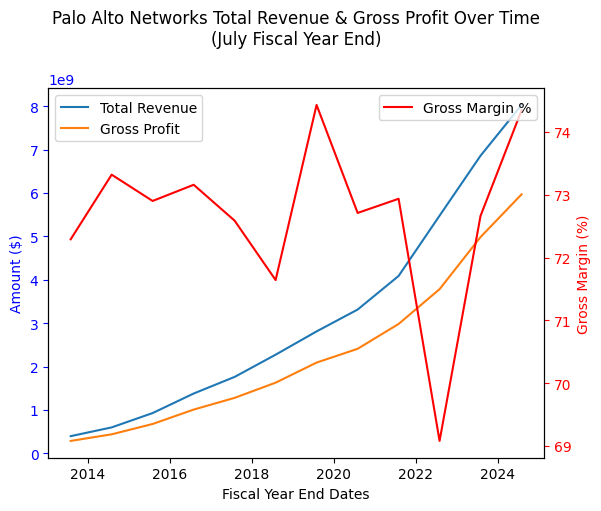

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

data = [{'fiscalDateEnding': d['fiscalDateEnding'], 'reportedCurrency': d['reportedCurrency'], 'grossProfit': float(d['grossProfit'].replace(',', '')), 'totalRevenue': float(d['totalRevenue'].replace(',', '')), 'costOfRevenue': float(d['costOfRevenue'].replace(',', '')), 'costofGoodsAndServicesSold': float(d['costofGoodsAndServicesSold'].replace(',', '')), 'operatingIncome': float(d['operatingIncome'].replace(',', '')), 'sellingGeneralAndAdministrative': float(d['sellingGeneralAndAdministrative'].replace(',', '')), 'researchAndDevelopment': float(d['researchAndDevelopment'].replace(',', '')), 'operatingExpenses': float(d['operatingExpenses'].replace(',', '')), 'netIncome': float(d['netIncome'].replace(',', '')),} for d in data_filtered]

df = pd.DataFrame(data)
df['fiscalDateEnding'] = df['fiscalDateEnding'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.set_index('fiscalDateEnding', inplace=True)
df.sort_index(ascending=False, inplace=True) # sort by fiscal date ending descending order

fig, ax1 = plt.subplots()
ax1.plot(df.index, df['totalRevenue'], label='Total Revenue')
ax1.plot(df.index, df['grossProfit'], label='Gross Profit')
ax1.set_xlabel("Fiscal Year End Dates")
ax1.set_ylabel("Amount ($)", color="blue")
ax1.tick_params('y', colors="blue")
ax1.legend(loc="upper left", prop={'size': 10})

# create a second y-axis and plot the gross margin on it
ax2 = ax1.twinx()
ax2.plot(df.index, df['grossProfit'] / df['totalRevenue'] * 100, label='Gross Margin %', color="red")
ax2.set_ylabel("Gross Margin (%)", color="red")
ax2.tick_params('y', colors="red")
ax2.legend(loc="upper right", prop={'size': 10})
plt.title("Palo Alto Networks Total Revenue & Gross Profit Over Time\n(July Fiscal Year End)\n")
plt.show()

In [35]:
!pip install openai

In [39]:
import os
from openai import OpenAI
client = OpenAI(api_key= userdata.get('openai_api'))

import openai
import pandas as pd

#openai.api_key = api_key

input_text = f"Itt vannak a Palo Alto Networks pénzügyi adatai JSON formátumban:\n\n{data_filtered}\n\nKérem, elemezze az adatokat. A szöveg magyar nyelű legyen!"

response = client.chat.completions.create(
  model="gpt-4o",
   messages=[
    {"role": "system", "content": input_text},
    ],
  #max_tokens=50,

)
generated_text = response.choices[0].message.content
print("GPT-4o Cégelemzés:", generated_text)

GPT-4o Cégelemzés: Az alábbiakban a Palo Alto Networks pénzügyi adatait fogom elemezni, különböző pénzügyi évekre vonatkozóan.

### Áttekintés:
A rendelkezésre álló adatok a 2013-as pénzügyi évtől a 2024-es évig terjednek. Az adatok USD-ben vannak megadva.

### Bevétel és Bruttó Nyereség:
- Az évek során a Palo Alto Networks bevétele fokozatos növekedést mutat, 2013-ban 396 millió USD-ról indulva 2024-ben elérve a körülbelül 8 milliárd USD-t.
- A bruttó nyereség is növekedett az évek során, megháromszorozódva 2013 és 2024 között. 2013-ban 286 millió USD volt, míg 2024-re 5,9 milliárd USD-re nőtt.

### Működési Bevétel:
- A cég sok éven keresztül működési veszteséget könyvelt el. 
- Az első jelentős pozitív működési bevétel 2023-ban jelentkezett (387 millió USD), majd ezt követően 2024-re 683 millió USD-re nőtt.

### Nettó Jövedelem:
- A cég kezdetben (2013-2021) folyamatosan nettó veszteségeket mutatott, ami 2013-ban -29 millió USD, 2021-ben pedig -499 millió USD volt.
- 2022-től kezdő

#Hogyan lehetne hetente generálni egy emailt az engem érdeklő tőzsdei cégekről összefoglalva a heti ármozgásokat, rövid szöveges formátumban esetleg egy diagrammot is csatolva?